# Classification of animals to 7 different classes

We have the zoo dataset with 16 different intermediate features and 101 different animals mapped to their corresponding class type. There are 7 different class types in the dataset. Now our task is to 
 - Identify the unique number of high level classes.
 - Perform clustering algorithms to 16 intermediate features to classify the animals and able to predict the new animals class type.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
animals = pd.read_csv('Animals.csv')
zoo = pd.read_csv('zoo.csv')

In [10]:
animals

,class_type,class_name,noOf_AnimalSpecies,Animal_names
0,1,Mammal,41,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,Bird,20,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,Reptile,5,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,Fish,13,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,Amphibian,4,"frog, frog, newt, toad"
5,6,Bug,8,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,Invertebrate,10,"clam, crab, crayfish, lobster, octopus, scorpi..."


We can see the 7 different classification of animals are:
 1. Mammal
 2. Bird
 3. Reptile
 4. Fish
 5. Amphibian
 6. Bug
 7. Invertebrate

Each class have different number of animal species in the dataset

In [11]:
zoo

,Animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


The zoo dataset has 16 different features in identifying the type of animal in the dataset. Animal_name is the animal present in the zoo, class_type is the classified type of the animal, this is our output

In [12]:
zoo.columns

Index(['Animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [13]:
#Checking for any missing values in the dataset
zoo.isnull().sum()

Animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

<AxesSubplot:>

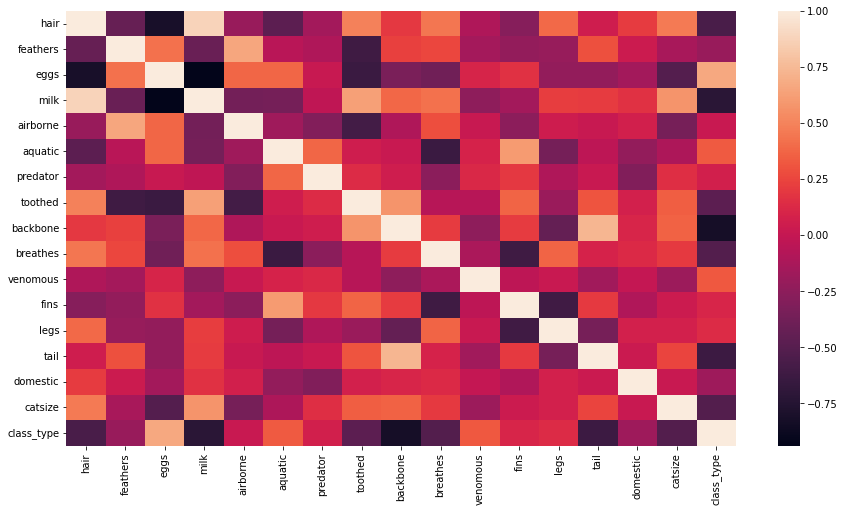

In [14]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(zoo.corr())

<AxesSubplot:>

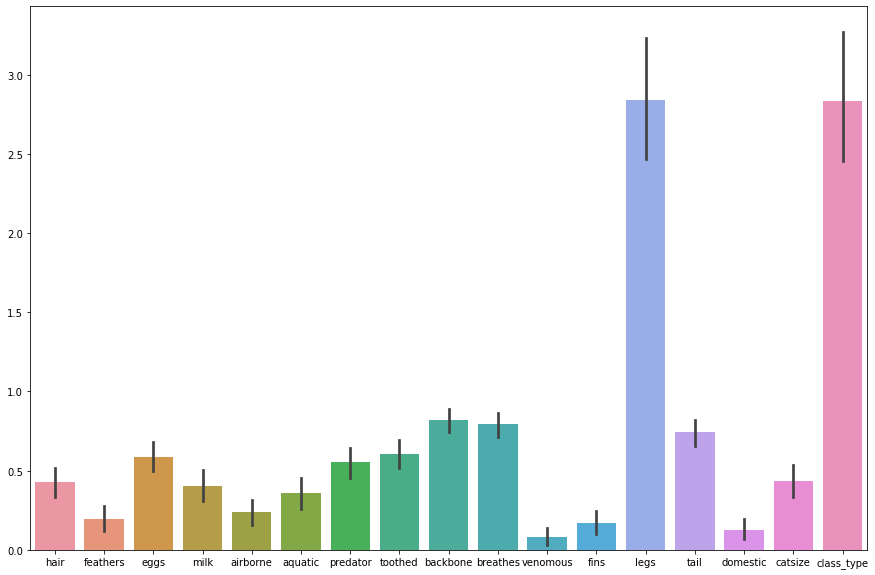

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(data=zoo)

# Identify the unique number of classes

<AxesSubplot:>

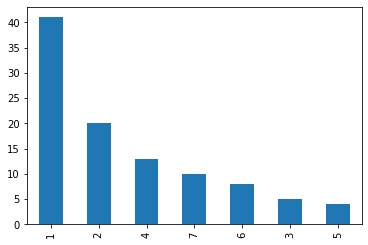

In [16]:
zoo['class_type'].value_counts().plot(kind='bar')

we can see the plot with 7 unique class of animals

Our main goal is to classify the animals to their classes and can able to predict the new animals its class from the corresponding inputs. So to gropu animals from the help of this graph it is understandable that clustering need to be performed

# Perform clustering using the features

In [17]:
features = zoo.values[:,1:-1]
features.shape

(101, 16)

In [18]:
features

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=object)

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances, classification_report, mean_squared_error as mse, accuracy_score

cluster_model = AgglomerativeClustering(n_clusters=7, linkage="average",affinity="cosine" )
cluster_model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [20]:
cluster_model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

# Compute the mean squared error by comparing the actual class and the predicted class.

In [21]:
score = mse(zoo['class_type'] , cluster_model.labels_)
abs_error = np.sqrt(score)
print(f"ROOT MEAN SQUARE ERROR (RMS ERROR)  :-  {abs_error} ")

ROOT MEAN SQUARE ERROR (RMS ERROR)  :-  3.1165479760672246 


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score
mae_Score = mean_absolute_error(zoo['class_type'],cluster_model.labels_)
print(f"Mean Absolute Error :- {mae_Score}")
r2 = abs(r2_score(zoo['class_type'],cluster_model.labels_))
print(f"R2 Score :- {r2}")

Mean Absolute Error :- 2.485148514851485
R2 Score :- 1.21876119670369
